In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

In [2]:
# Import data

# API (Using the API returns partial dataset)
# https://data.cityofchicago.org/resource/xzkq-xp2w.json 

data = 'Current_Employee_Names__Salaries__and_Position_Titles.csv'
df = pd.read_csv(data, sep=',') 

print('Shape ',df.shape,'\n')
print('Columns ',df.columns,'\n')
print('Info', df.info(),'\n')

Shape  (32928, 8) 

Columns  Index(['Name', 'Job Titles', 'Department', 'Full or Part-Time',
       'Salary or Hourly', 'Typical Hours', 'Annual Salary', 'Hourly Rate'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32928 entries, 0 to 32927
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               32928 non-null  object 
 1   Job Titles         32928 non-null  object 
 2   Department         32928 non-null  object 
 3   Full or Part-Time  32928 non-null  object 
 4   Salary or Hourly   32928 non-null  object 
 5   Typical Hours      7631 non-null   float64
 6   Annual Salary      25297 non-null  object 
 7   Hourly Rate        7631 non-null   float64
dtypes: float64(2), object(6)
memory usage: 2.0+ MB
Info None 



In [3]:
# Rename columns. COnvert annual salary to float
df.rename(columns={'Name': 'name', 
                   'Job Titles': 'job_titles', 
                   'Department': 'department', 
                   'Full or Part-Time': 'full_part_time', 
                   'Salary or Hourly': 'salary_hourly', 
                   'Typical Hours': 'typical_hours', 
                   'Annual Salary': 'annual_salary', 
                   'Hourly Rate': 'hourly_rate'}, inplace=True)

df['annual_salary'] = df['annual_salary'].str.replace(r",",'')
df['annual_salary'] = df['annual_salary'].astype(float)
print('Info', df.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32928 entries, 0 to 32927
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            32928 non-null  object 
 1   job_titles      32928 non-null  object 
 2   department      32928 non-null  object 
 3   full_part_time  32928 non-null  object 
 4   salary_hourly   32928 non-null  object 
 5   typical_hours   7631 non-null   float64
 6   annual_salary   25297 non-null  float64
 7   hourly_rate     7631 non-null   float64
dtypes: float64(3), object(5)
memory usage: 2.0+ MB
Info None 



In [4]:
# create salary bins for analysis
salary_labels = ['0-10', '11-100', '101-1K', '1K-10K','10K-100K','100K-1M']
salary_bins = [-1, 10, 100, 1000, 10000, 100000, 1000000]

df['salary_bins'] = pd.cut(df['annual_salary'], bins=salary_bins, labels=salary_labels, include_lowest=True)
print('Info', df.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32928 entries, 0 to 32927
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   name            32928 non-null  object  
 1   job_titles      32928 non-null  object  
 2   department      32928 non-null  object  
 3   full_part_time  32928 non-null  object  
 4   salary_hourly   32928 non-null  object  
 5   typical_hours   7631 non-null   float64 
 6   annual_salary   25297 non-null  float64 
 7   hourly_rate     7631 non-null   float64 
 8   salary_bins     25297 non-null  category
dtypes: category(1), float64(3), object(5)
memory usage: 2.0+ MB
Info None 



In [5]:
# Total Employees
print('Total Employees ',df.shape[0],'\n')

# Number of Departments
print('Number of Departments', df['department'].nunique(),'\n')

# List of Departments
print('List of Departments',pd.unique(df['department']).tolist(),'\n')

Total Employees  32928 

Number of Departments 36 

List of Departments ['POLICE', 'DAIS', 'WATER MGMNT', 'TRANSPORTN', 'OEMC', 'AVIATION', 'FIRE', 'FAMILY & SUPPORT', 'LAW', 'STREETS & SAN', 'HEALTH', 'FINANCE', 'BUSINESS AFFAIRS', 'HUMAN RESOURCES', 'PUBLIC LIBRARY', 'CITY COUNCIL', 'CULTURAL AFFAIRS', 'COPA', 'HOUSING', 'PROCUREMENT', 'BUILDINGS', 'ANIMAL CONTRL', 'HOUSING & ECON DEV', 'BOARD OF ELECTION', 'PUBLIC SAFETY ADMIN', 'DISABILITIES', 'CITY CLERK', 'INSPECTOR GEN', 'HUMAN RELATIONS', "MAYOR'S OFFICE", 'TREASURER', 'BUDGET & MGMT', 'BOARD OF ETHICS', 'ADMIN HEARNG', 'POLICE BOARD', 'LICENSE APPL COMM'] 



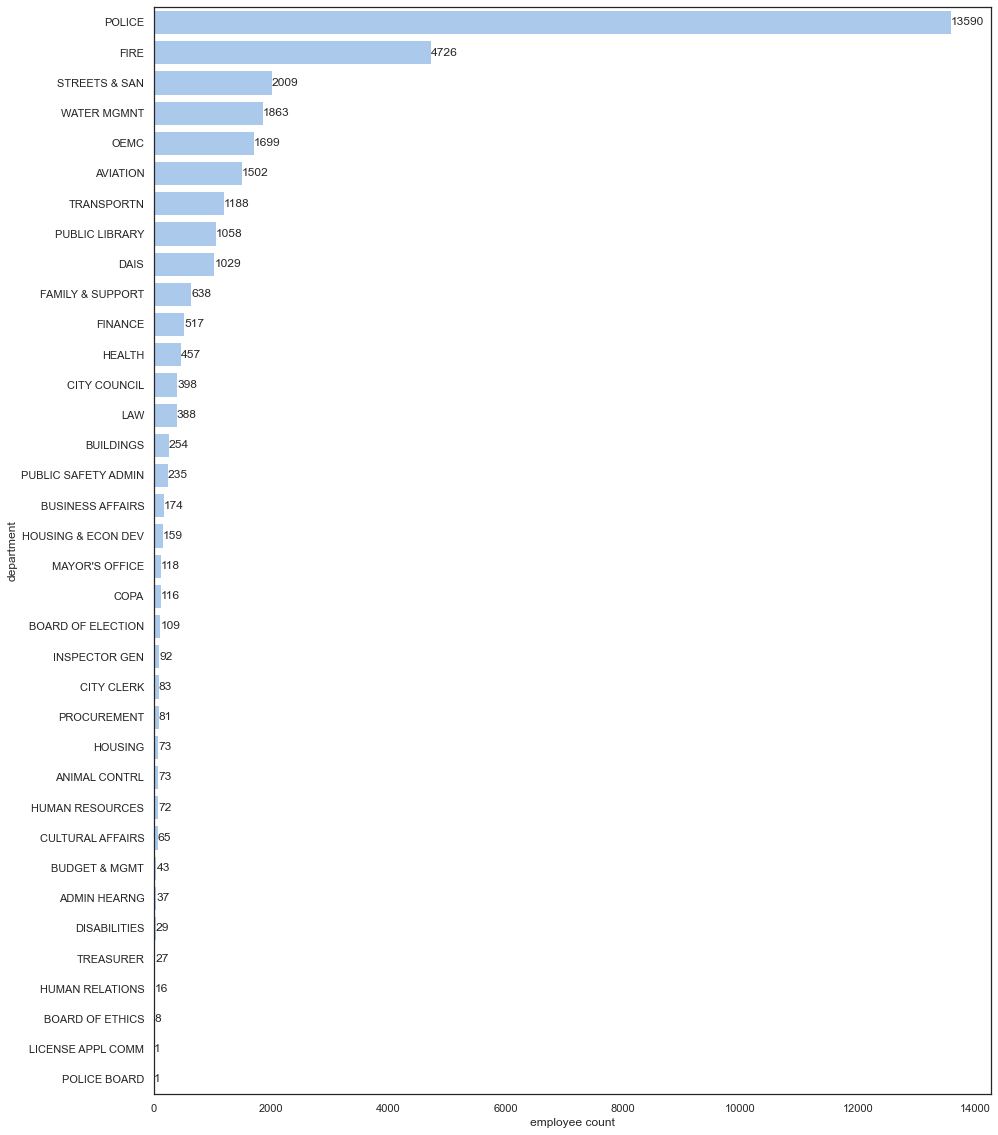

In [6]:
# Chart Employees per department
df_emp_dept = df.groupby('department')['name'].count().reset_index(name='employee count').sort_values('employee count', ascending=False)
# df_emp_dept

sns.set(style="white")
f, ax = plt.subplots(figsize=(15, 20))
sns.set_color_codes("pastel")

ax = sns.barplot(x="employee count", y="department", data=df_emp_dept, color="b")
for p in ax.patches:
    _x = p.get_x() + p.get_width() + 0.4
    _y = p.get_y() + p.get_height() - 0.4
    value = int(p.get_width())
    ax.text(_x, _y, value, ha="left", va="center")
    
# Alternate count plot
# chart = sns.countplot(
# #     data=data[data['Year'] == 1980],
#     data=df_salary_emp,
#     y='department',
#     palette='Set1'
# )


(0.0, 287734.2)

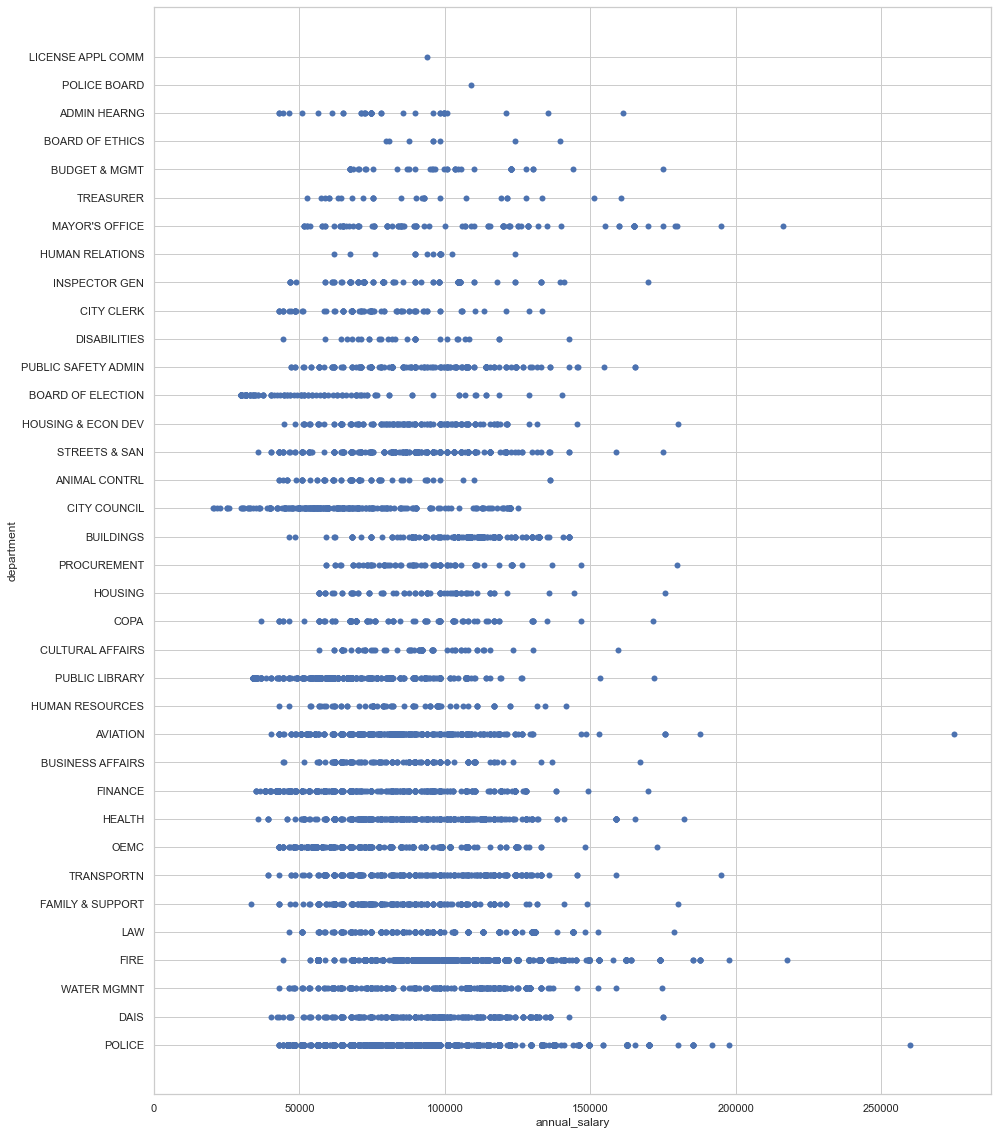

In [7]:
# Range of salaries by department (Salaried employees)
df_salary_emp = df.query("salary_hourly == 'Salary'")

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 20))

ax = sns.scatterplot(x="annual_salary", 
                y="department", 
                data=df_salary_emp, 
                linewidth=0)

ax.set_xlim(0, None)

(0.0, 134.25)

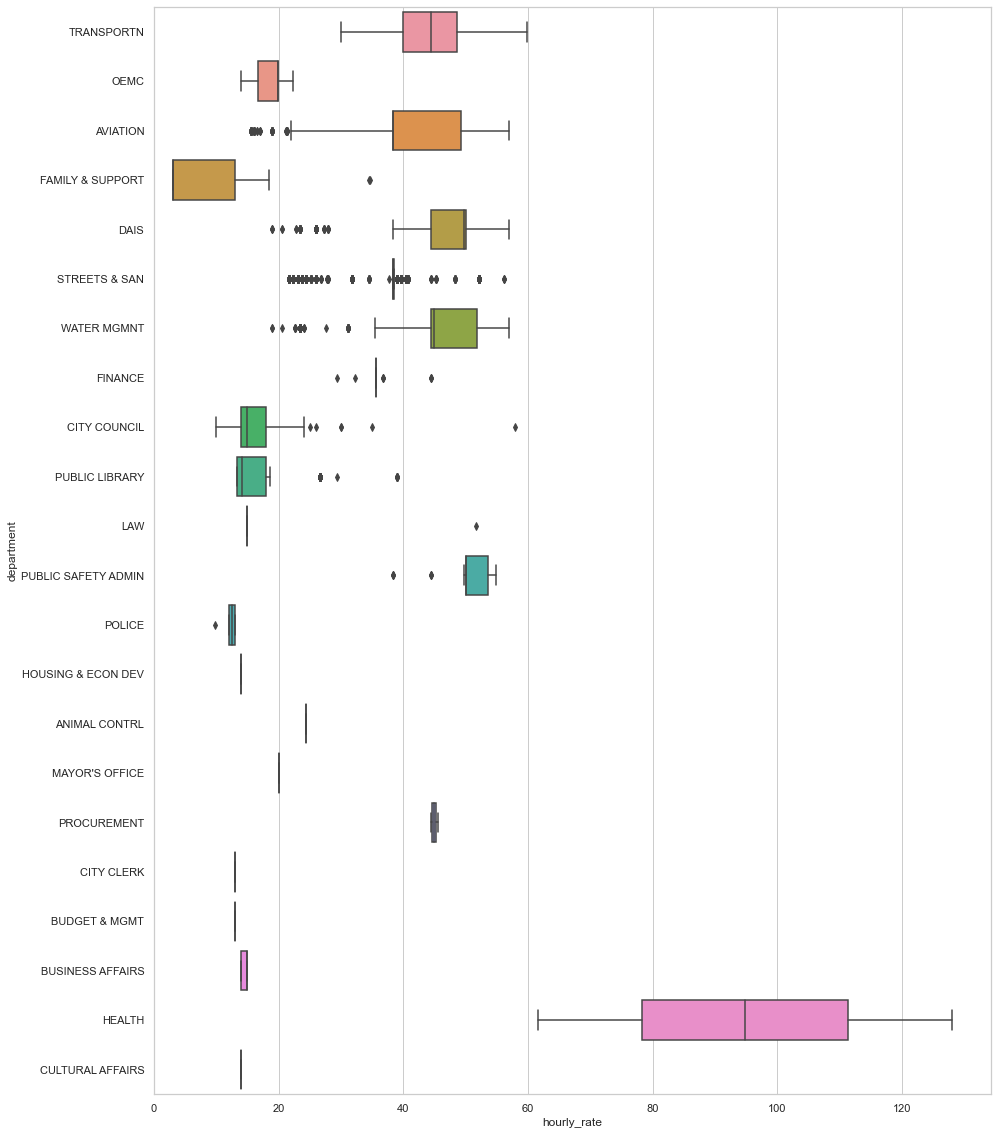

In [74]:
# Distribution of hourly rate by department (for Hourly employees)
df_hourly_emp = df.query("salary_hourly == 'Hourly'")

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 20))

ax = sns.boxplot(x="hourly_rate", 
                y="department", 
                data=df_hourly_emp)

# sns.swarmplot(x="hourly_rate", 
#                 y="department", 
#                 color=".25",   
#                 data=df_hourly_emp)

ax.set_xlim(0, None)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'COMMISSIONER OF AVIATION'),
  Text(1, 0, 'SUPERINTENDENT OF POLICE'),
  Text(2, 0, 'FIRE COMMISSIONER'),
  Text(3, 0, 'MAYOR'),
  Text(4, 0, 'FIRST DEPUTY FIRE COMMISSIONER'),
  Text(5, 0, 'FIRST DEPUTY SUPERINTENDENT'),
  Text(6, 0, 'COMMISSIONER OF TRANSPORTATION'),
  Text(7, 0, 'CHIEF OF STAFF'),
  Text(8, 0, 'DEPUTY SUPERINTENDENT'),
  Text(9, 0, 'FIRST DEPUTY COMMISSIONER')])

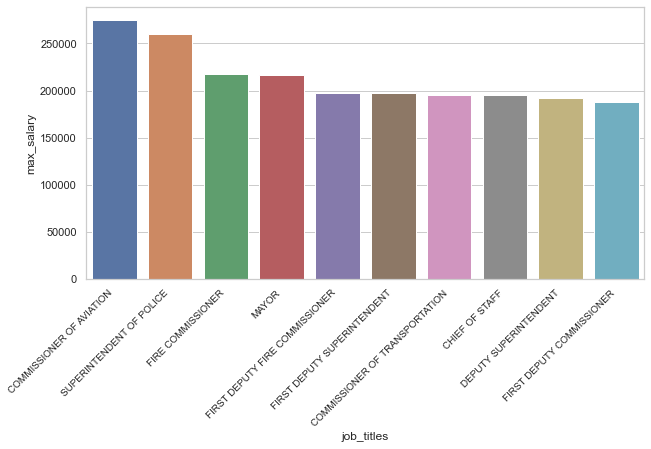

In [72]:
# Job titles of highest 10 salaried employees
df_chart = df_salary_emp.groupby('job_titles')['annual_salary'].max().reset_index(name='max_salary').sort_values('max_salary', ascending=False).head(10)

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(
    data=df_chart,
    x='job_titles',
    y='max_salary'
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

In [73]:
# 2 Higest paid job titles by department
df1 = df_salary_emp.groupby(['department','job_titles'])['annual_salary'].max().reset_index(name='max_salary').sort_values(['department','max_salary'], ascending=True)
df1 = df1.groupby(['department','job_titles'])[['max_salary']].max().sort_values(['department','max_salary'], ascending=(True, False))
df1.groupby('department').head(2)

max_salary
department    job_titles                                           
ADMIN HEARNG  DIR OF ADMINISTRATIVE HEARINGS               161112.0
              DEPUTY DIR OF ADMINISTRATIVE ADJUDICATION    135624.0
ANIMAL CONTRL VETERINARIAN                                 136320.0
              DEPUTY DIR                                   110076.0
AVIATION      COMMISSIONER OF AVIATION                     275004.0
...                                                             ...
TRANSPORTN    FIRST DEPUTY COMMISSIONER                    159036.0
TREASURER     DEPUTY CITY TREASURER                        160632.0
              CITY TREASURER                               133545.0
WATER MGMNT   COMMISSIONER OF WATER MGMT                   174600.0
              FIRST DEPUTY COMMISSIONER                    159036.0

[70 rows x 1 columns]